In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def getam(numbins, f, x):
    # numbins = 4
    numbins = numbins + 1
    bins = np.linspace(min(f), max(f)+0.001, numbins)
    am = np.zeros((numbins, numbins))
    distm = np.zeros((numbins, numbins))
    countm = np.zeros((numbins, numbins))
    for counti, i in enumerate(f[:]):
        ibin = np.where(bins>i)[0][0]
        for countj, j in enumerate(f[counti:]):
            if counti==countj:
                continue
            jbin = np.where(bins>j)[0][0]
            countm[ibin-1, jbin-1] += 1
            distm[ibin-1, jbin-1] += abs(x[counti] - x[countj])
            am[ibin-1, jbin-1] += 1/abs(x[counti] - x[countj])

    return countm[:-1,:-1], distm[:-1,:-1], am[:-1,:-1]

In [3]:
numbins = 7

datas = os.listdir("../Crowdsourcecopy/crowdsource/crowdsource/csdata/data1")
dir_data = "../Crowdsourcecopy/crowdsource/crowdsource/csdata/data1/"+datas[200]
dir_data = '../Crowdsourcecopy/crowdsource/crowdsource/csdata/data1/DC21ujfc_crowdsource_rs.csv'
dir_data = "../Crowdsourcecopy/crowdsource/crowdsource/csdata/data/DC22evgfo_crowdsource_rs.csv"
dir_data

'../Crowdsourcecopy/crowdsource/crowdsource/csdata/data/DC22evgfo_crowdsource_rs.csv'

In [4]:
df = pd.read_csv(dir_data)
df.columns = ['index', 'x', 'y', 'flux', 'deltx', 'delty', 'chi2_', 'dx', 'dy',
       'dflux', 'qf', 'rchi2', 'fracflux', 'fluxlbs', 'dfluxlbs', 'fwhm',
       'spread_model', 'dspread_model', 'fluxiso', 'xiso', 'yiso', 'sky',
       'BADIM FLAG', 'BADFIT FLAG', 'FAILED FIT', 'FIT CHI2',
       'APERTURE RADIUS', 'QUALITY FLAG', 'STDEV FLAG', 'RELERR FLAG',
       'ref_fn', 'forced_fn', 'fn_index', 's', 'seeing', 'magzp', 'band',
       'candidate_id', 'MJD', 'resim_']

EmptyDataError: No columns to parse from file

In [11]:
df = df.iloc[np.where(df.band=="g")]
df = df.iloc[np.where((df["QUALITY FLAG"]>3))]
df = df.iloc[np.where((df["QUALITY FLAG"]<6))]
df = df.iloc[np.where((df["RELERR FLAG"]==0))]
df = df.iloc[np.where((df["chi2_"]<120))]
df = df.iloc[np.where((df["magzp"]!=0))]
df = df.iloc[np.where((df["seeing"]!=0))]
#df = df.iloc[np.where(((df["flux"]/df["dflux"])<0.2))]
# dfn = dfn.iloc[np.where((dfn["seeing"]>1))]
df["normflux"] = df["flux"]*(10**((df["magzp"]-29)/2.5))
df["dnormflux"] = df["dflux"]*(10**((df["magzp"]-29)/2.5))
df = df.iloc[np.where((df["dnormflux"]/df["normflux"])<0.2)]
df = df.sort_values("MJD")
df = df.reset_index()

In [12]:
df

,level_0,index,x,y,flux,deltx,delty,chi2_,dx,dy,...,fn_index,s,seeing,magzp,band,candidate_id,MJD,resim_,normflux,dnormflux
0,384,0,15.297512,16.067082,13317.266602,-0.026858,0.000246,23.661519,0.183057,0.181070,...,389,15,1.298308,29.510729,g,DC21ujfc,59295.384410,[[ 1.45288239e+02 1.21671860e+02 9.94405823e...,21316.038532,1784.776203
1,534,0,15.549086,15.348591,14718.528320,0.040359,-0.026304,26.989027,0.168307,0.166490,...,547,15,1.220496,29.512055,g,DC21ujfc,59295.388149,[[ 1.38122528e+02 1.23651237e+02 9.23047028e...,23587.746375,1870.328546
2,383,0,15.415766,15.926841,14576.564453,-0.041336,0.002414,25.013439,0.168981,0.170511,...,388,15,1.216645,29.513003,g,DC21ujfc,59295.391910,[[ 1.45635010e+02 1.07805962e+02 8.63513031e...,23380.637776,1875.100223
3,387,0,15.722279,15.244598,13199.943359,0.033013,-0.018721,28.283221,0.187492,0.185448,...,392,15,1.360276,29.515510,g,DC21ujfc,59295.397104,[[ 1.70518799e+02 1.38659073e+02 1.26719940e...,21221.507279,1809.442584
4,385,0,15.538596,15.232276,14113.942383,0.049835,-0.022350,25.724616,0.186608,0.182794,...,390,15,1.289953,29.507742,g,DC21ujfc,59295.400819,[[ 1.33710480e+02 1.27590591e+02 7.61788788e...,22529.175023,1920.689778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,16,0,15.973440,15.875442,8671.459961,0.034395,0.024005,3.536195,0.253768,0.249245,...,16,15,1.813102,29.567594,g,DC21ujfc,59836.004599,[[ 2.60807129e+02 2.49725769e+02 2.14558502e...,14626.143952,1574.257941
114,11,0,15.575090,15.978142,9174.835938,0.061851,0.007901,9.005889,0.244071,0.240883,...,11,15,1.769446,29.553286,g,DC21ujfc,59836.008286,[[ 1.88191559e+02 1.93491989e+02 1.54303635e...,15272.588425,1591.111070
115,9,0,15.913837,15.410025,10132.561523,0.038348,-0.040444,11.694987,0.225637,0.225898,...,9,15,1.715842,29.551461,g,DC21ujfc,59836.011982,[[ 2.32688034e+02 2.08499832e+02 1.74495804e...,16838.511919,1651.802414
116,6,0,15.088963,15.389445,9936.822266,0.006979,-0.032947,5.830318,0.230498,0.228784,...,6,15,1.681283,29.527864,g,DC21ujfc,59836.015676,[[ 1.42092209e+02 1.38845215e+02 1.06565620e...,16158.205155,1606.165524


In [13]:
def pspl_model(mjd, f, u0, tE, t0):
    x = mjd
    t = x - np.min(x) - (np.max(x) - np.min(x))/2 # reformat the time to have the middle at 0
    u = (u0**2 + ((t - t0)/tE)**2)**0.5 # find u(t)
    A = (u**2 + 2)/(u*(u**2 + 4)**0.5) # find A(t)
    
    return mjd, A*f, A

Text(0.5, 1.0, 'Raw Light Curve')

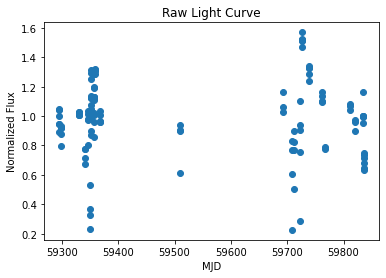

In [14]:
myt = df["MJD"]
myf = df["normflux"]/np.median(df["normflux"])
plt.scatter(myt, myf)
plt.xlabel("MJD")
plt.ylabel("Normalized Flux")
plt.title("Raw Light Curve")

/tmp/ipykernel_85915/912084953.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_not_ml))


Text(0.5, 1.0, 'Natural Log Adjacency Matrix for Raw Light Curve')

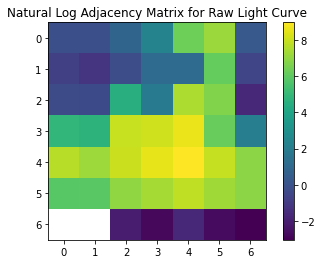

In [15]:
_, _, am_not_ml = getam(numbins, df["normflux"], df["MJD"])
plt.imshow(np.log(am_not_ml))
plt.colorbar()
plt.title("Natural Log Adjacency Matrix for Raw Light Curve")
#plt.title("Natural Log of Adjacency Matrix (values far apart)")

In [16]:
u0 = round(np.random.uniform(0.1, 1), 2)
tE = round(np.random.uniform((max(df["MJD"]) - min(df["MJD"]))/5, 3*(max(df["MJD"]) - min(df["MJD"]))/2))
x = df["MJD"]
t = x - np.min(x) - (np.max(x) - np.min(x))/2 # reformat the time to have the middle at 0
t0 = round(np.random.uniform(min(t) + 20, max(t) - 20))
u0 = 0.2
tE = 200
# t0=50
t0 = 59334 - min(df["MJD"])
t0 = 0


In [17]:
# t0 = 51

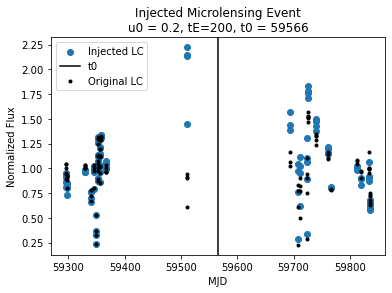

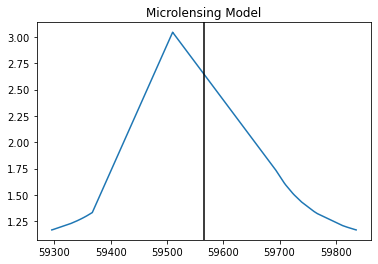

In [18]:
#for i in range(round(min(t) + 20), round(max(t) + 20)):
#t0 = i
myt, myf, _ = pspl_model(df["MJD"], df["normflux"], u0, tE, t0)
A = myf/np.median(myf)
plt.scatter(df["MJD"], A, label="Injected LC")

plt.title(f"Injected Microlensing Event\nu0 = {u0}, tE={tE}, t0 = {round(t0 + np.min(x) + (np.max(x) - np.min(x))/2)}")
plt.axvline(round(t0 + np.min(x) + (np.max(x) - np.min(x))/2), color = 'k', label = 't0')
plt.xlabel("MJD")
plt.ylabel("Normalized Flux")
plt.plot(df["MJD"], df["normflux"]/np.median(df["normflux"]), "k.", label="Original LC")
plt.legend()
plt.show()

plt.plot(myt, _)
plt.axvline(round(t0 + np.min(x) + (np.max(x) - np.min(x))/2), color = 'k', label = 't0')
plt.title("Microlensing Model")
plt.show()

/tmp/ipykernel_85915/1194355180.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_ml))


Text(0.5, 1.0, 'Natural Log of Adjacency Matrix for Injected Microlensing Event')

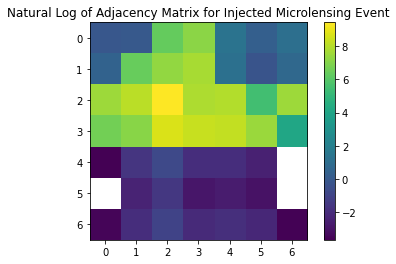

In [19]:
_, _, am_ml = getam(numbins, A, myt)
plt.imshow(np.log(am_ml))
plt.colorbar()
am_ml
plt.title("Natural Log of Adjacency Matrix for Injected Microlensing Event")

/tmp/ipykernel_85915/1194355180.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_ml))


Text(0.5, 1.0, 'Natural Log of Adjacency Matrix for Injected Microlensing Event')

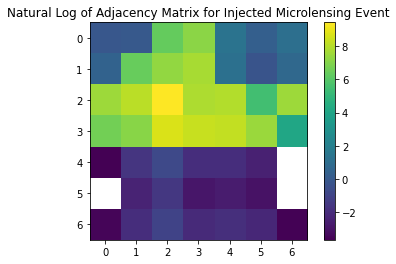

In [20]:
_, _, am_ml = getam(numbins, A, myt)
plt.imshow(np.log(am_ml))
plt.colorbar()
am_ml
plt.title("Natural Log of Adjacency Matrix for Injected Microlensing Event")

In [21]:
f = np.random.uniform(min(df["normflux"]), max(df["normflux"]), len(df["MJD"]))
f = f/np.median(f)

Text(0, 0.5, "'Flux' (Noise)")

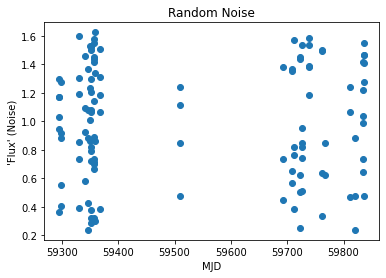

In [22]:
plt.scatter(df["MJD"], f)
plt.title("Random Noise")
plt.xlabel("MJD")
plt.ylabel("'Flux' (Noise)")

/tmp/ipykernel_85915/3025002011.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(am_noise))


Text(0.5, 1.0, 'Natural Log of Adjacency Matrix for Random Noise')

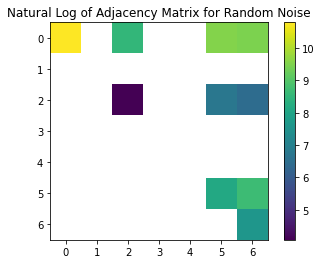

In [23]:
_, _, am_noise = getam(numbins, df["MJD"], f)
plt.imshow(np.log(am_noise))
plt.colorbar()
plt.title("Natural Log of Adjacency Matrix for Random Noise")

In [24]:
am_noise

array([[48824.84050806,     0.        ,  5022.14036488,     0.        ,
            0.        , 14098.74587923, 12941.92709142],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,    58.47154297,     0.        ,
            0.        ,   838.39081971,   630.15292074],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,  3394.77538916,  5962.00577855],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,  1992.68534404]])

In [25]:
def pspl_model(mjd, f, u0, tE, t0):
    x = mjd
    t = x - np.min(x) - (np.max(x) - np.min(x))/2 # reformat the time to have the middle at 0
    u = (u0**2 + ((t - t0)/tE)**2)**0.5 # find u(t)
    A = (u**2 + 2)/(u*(u**2 + 4)**0.5) # find A(t)
    
    return mjd, A*f, A

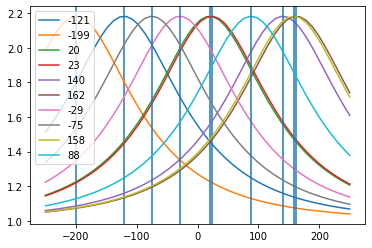

In [26]:
newt = np.linspace(-250, 250)
f = np.zeros(len(newt)) + 1
u0 = 0.5
tE = 200
for i in range(10):
    x = df["MJD"]
    t = x - np.min(x) - (np.max(x) - np.min(x))/2 # reformat the time to have the middle at 0
    t0 = round(np.random.uniform(min(t) + 20, max(t) - 20))
    _, newf, newA = pspl_model(newt, f, u0, tE, t0)
    
    plt.plot(newt, newA, label=round(t0))
    plt.axvline(t0)
plt.legend()  

In [27]:
np.append(np.array(["fn", "ml", tE, t0, u0]), am_ml.flatten())

array(['fn', 'ml', '200', '88', '0.5', '0.9161825220401834',
       '1.0031808649715315', '547.5731964898417', '1267.8887381488025',
       '3.692717179354216', '1.3644568590195107', '3.0072406166687546',
       '1.542389246896232', '585.835177422927', '1465.9607221725983',
       '2174.96828290324', '3.160327175880107', '0.7895457308773101',
       '2.160263307104443', '1809.7274419435141', '3236.8506076554654',
       '12302.407180194166', '2441.8978937921456', '2727.1894548746973',
       '229.59378170191283', '1811.549642985788', '771.1300281406152',
       '1204.7698589616261', '5845.15368374072', '4138.064850178973',
       '3765.349795202136', '1709.0135249461343', '58.63282699994475',
       '0.02597482245357755', '0.19328272313306882',
       '0.45754936436685945', '0.14556482304068444',
       '0.14147879037481487', '0.08632082642873107', '0.0', '0.0',
       '0.09574784099038586', '0.21699116211173006',
       '0.05783023657061458', '0.06977776173614156',
       '0.048732360

In [30]:
# Generate Low Noise Microlensing Event
f = np.random.uniform(min(df["normflux"]), (max(df["normflux"]) - min(df["normflux"]))/5, len(df["MJD"]))
# f = f/np.median(f)

#MATRIX FOR LOW LC NOISE

_, _, low_noise_not_ml_event = getam(numbins, f/np.median(f), df["MJD"])

low_noise_not_mlevent = np.append(np.array([dir_data, "low_noise_not_mlevent", 0, 0, 0]), low_noise_not_ml_event.flatten())

#MATRIX FOR LOW NOISE + INJECTED MICROLENSING EVENT

myt, myf, _ = pspl_model(df["MJD"], f, u0, tE, t0)

_, _, random_lownoise_am_ml_new = getam(numbins, myf/np.median(myf), myt)

Text(0, 0.5, "'Flux' (Noise)")

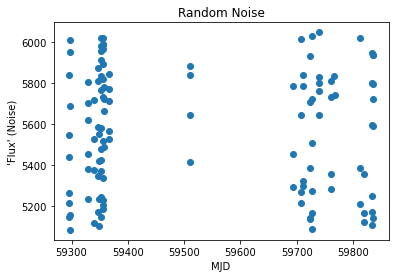

In [31]:
plt.scatter(df["MJD"], f)
plt.title("Random Noise")
plt.xlabel("MJD")
plt.ylabel("'Flux' (Noise)")

Text(0, 0.5, "'Flux' (Noise)")

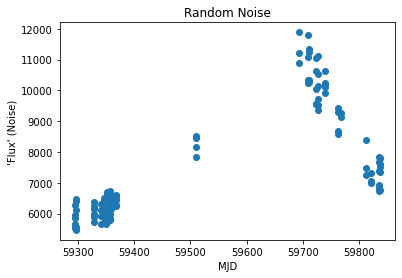

In [32]:
plt.scatter(myt, myf)
plt.title("Random Noise")
plt.xlabel("MJD")
plt.ylabel("'Flux' (Noise)")